# Project: Wrangling and Analyze Data

# Table of Content

1. Data Gathering

2. Assessing Data.

   Virtual Assessment

   Programmatically Assessment

3. Cleaning Data.

4. Storing Data.

5. Analyzing and Visualizing Data
   
   Insights

   Visualization.



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
import seaborn as sns
import requests
import json
%matplotlib inline


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
df_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [5]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)

In [7]:
r.status_code

200

In [8]:
r.headers.get("content-type")

'text/tab-separated-values; charset=utf-8'

In [9]:
open("image-predictions.tsv", "wb").write(r.content)

335079

In [10]:
df_image = pd.read_csv("image-predictions.tsv", sep = "\t")

In [11]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [12]:
#reading a text file line by line
#using the text to form a list of dictionaries
with open('tweet-json.txt') as file:
  tweets = []
  for line in file:
    tweets.append(json.loads(line))

In [13]:
#create a dataframe from tweet_list of dictionaries
#saving it as a dataframe with the name df_tweets
df_tweets = pd.DataFrame(tweets)
columns = ['id', 'retweet_count', 'favorite_count']

df_tweets = df_tweets[columns]

In [14]:
df_tweets.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.





## visual assessment

In [15]:
#
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
df_tweets.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Programmatically Assessment

## Twitter_archive
Checking the general info of the dataframe(twitter_archive_enhanced.csv): datatypes, counts of each features, number of columns and rows.

In [18]:
df_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [19]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

There are are missing values in columns; in_reply_to_status_id,      in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls.


In [20]:
#checking for the sum of missing values in each column.
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [21]:
#checking randomly in the dataframe.
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
1167,721503162398597120,NaN,NaN,2016-04-17 00:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Panda. He's happy af. 11/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/721503162...,11,10,Panda,None,None,None,None
1432,697482927769255936,NaN,NaN,2016-02-10 18:11:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Blipson. He's a Doowap Hufflepuff. That U...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697482927...,11,10,Blipson,None,None,None,None
1343,704761120771465216,NaN,NaN,2016-03-01 20:11:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper killed this great white in an epic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704761120...,13,10,None,None,None,pupper,None
1438,696900204696625153,NaN,NaN,2016-02-09 03:35:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rosie. She's a Benebark Cumberpatch. S...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696900204...,12,10,Rosie,None,None,None,None


In [22]:
# checking the last 5 values of the dataframe.
df_archive.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [23]:
#checking the general statistics summary of the dataframe
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [24]:
#checking the total sum of duplicate value in expanded_urls column.
df_archive['expanded_urls'].duplicated().sum()

137

In [25]:
# checking for the count of each unique values in doggo, floofer, pupper, puppo columns.
doggo = df_archive['doggo'].value_counts()
floofer = df_archive['floofer'].value_counts()
pupper = df_archive['pupper'].value_counts()
puppo = df_archive['puppo'].value_counts()
print(doggo); 
print(floofer); 
print(pupper); 
print(puppo)

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [26]:
# checking for the total number of unique value in the name column
df_archive['name'].nunique()

957

In [27]:
#checking for the unique value of the name column.
df_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [28]:
#checking for the counts of the each unique value in the name column
df_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [29]:
#checking for the list of name with lowercase.
list(df_archive[df_archive['name'].str.islower()].name.value_counts().index)


['a',
 'the',
 'an',
 'very',
 'just',
 'quite',
 'one',
 'getting',
 'actually',
 'mad',
 'not',
 'old',
 'life',
 'officially',
 'light',
 'by',
 'infuriating',
 'such',
 'all',
 'unacceptable',
 'this',
 'his',
 'my',
 'incredibly',
 'space']

In [30]:
df_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## Image_Prediction

In [31]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [32]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [34]:
#checking for the list of p1, p2, p3 columns with lowercase.
P1 = list(df_image[df_image['p1'].str.islower()].p1.value_counts().index)
P2 = list(df_image[df_image['p2'].str.islower()].p2.value_counts().index)
P3 = list(df_image[df_image['p3'].str.islower()].p3.value_counts().index)
print(P1);
print(P2);
print(P3)

['golden_retriever', 'pug', 'chow', 'toy_poodle', 'malamute', 'cocker_spaniel', 'miniature_pinscher', 'seat_belt', 'web_site', 'teddy', 'beagle', 'kuvasz', 'basset', 'vizsla', 'dalmatian', 'soft-coated_wheaten_terrier', 'kelpie', 'boxer', 'schipperke', 'collie', 'malinois', 'whippet', 'tennis_ball', 'dingo', 'borzoi', 'standard_poodle', 'doormat', 'flat-coated_retriever', 'miniature_poodle', 'papillon', 'tub', 'swing', 'basenji', 'hamster', 'bloodhound', 'bath_towel', 'ice_bear', 'home_theater', 'car_mirror', 'redbone', 'llama', 'hippopotamus', 'minivan', 'bull_mastiff', 'ox', 'shopping_cart', 'porcupine', 'barrow', 'bathtub', 'brown_bear', 'patio', 'bow_tie', 'goose', 'wombat', 'miniature_schnauzer', 'hog', 'keeshond', 'jigsaw_puzzle', 'bluetick', 'guinea_pig', 'dishwasher', 'briard', 'white_wolf', 'window_shade', 'cairn', "jack-o'-lantern", 'stone_wall', 'vacuum', 'refrigerator', 'washbasin', 'space_heater', 'mousetrap', 'motor_scooter', 'ram', 'cowboy_hat', 'balloon', 'toilet_tissue

In [35]:
#checking for the total sum of duplicated values in jpg_url
df_image['jpg_url'].duplicated().sum()

66

## tweet_json.txt

In [36]:
df_tweets.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [37]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues
df_archive

1.Tweet_id, Retweeted_status_id, Retweeted_status_user_id float datatype should be coverted to appriopriate datatype(Object) 

2.Timestamp and Retweete_status_timestamp datatype should be coverted to appriopriate datatype(datetime)

3.Doggo, Floofer, Pupper and Puppo has missing value indicated as "None" instead of "NaN".

4.expanded_url has duplicated value.

5.Name has irrelevant names like 'a', 'not', 'all', 'by', 'the', 'my', 'this', and 'his'. 

6.Only the original tweet is needed, drop all retweet columnsi.e in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp are not needed.

df_image

7.The p1,p2 and p3 columns has some lowercase letters.

8.duplicated values in jpg_url.

9.Tweet_id should be converted to object datatype.

df_tweet

10.Id should be rename the appropriate column(Tweet_id) and change to an object datatype.

11.retweet_count should be dropped.



### Tidiness issues
df_archive

1.Doggo,Floofer,Pupper and Puppo column should be combined to one column as "dog_stages"

2.the three table should be merged.



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

In [38]:
# Make copies of original pieces of data
df_twitter_archive = df_archive.copy()
df_image_pred = df_image.copy()
df_tweets_data = df_tweets.copy()

### Quality Issue #1:Tweet_id, Retweeted_status_id, Retweeted_status_user_id float datatype should be coverted to appriopriate datatype(Object) 

#### Define:change Tweet_id, Retweeted_status_id, Retweeted_status_user_id datatype to object using .astype(object)


#### Code

In [39]:
df_twitter_archive['tweet_id'] = df_twitter_archive['tweet_id'].astype(object)
df_twitter_archive['retweeted_status_id'] = df_twitter_archive['retweeted_status_id'].astype(object)
df_twitter_archive['retweeted_status_user_id'] = df_twitter_archive['retweeted_status_user_id'].astype(object)


#### Test

In [40]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    object 
 7   retweeted_status_user_id    181 non-null    object 
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Quality Issue #2:Timestamp and retweeted_status_timestamp datatype should be datatime

#### Define: changing the timestamp and retweeted_status_timestamp to datetime using .to_datetime function


#### Code

In [41]:
df_twitter_archive['timestamp'] = pd.to_datetime(df_twitter_archive['timestamp'])
df_twitter_archive['retweeted_status_timestamp'] = pd.to_datetime(df_twitter_archive['retweeted_status_timestamp'])

#### Test

In [42]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    object             
 7   retweeted_status_user_id    181 non-null    object             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Quality issue #3:Doggo, Floofer, Pupper and Puppo has missing value indicated as "None" instead of "NaN".

#### Define: Replacing all "None" value with "NaN" to a standard form of null values using.replace()method. 

#### Code

In [43]:
df_twitter_archive['doggo'].replace('None', np.NAN, inplace=True)
df_twitter_archive['floofer'].replace('None', np.NAN, inplace=True)
df_twitter_archive['pupper'].replace('None', np.NAN, inplace=True)
df_twitter_archive['puppo'].replace('None', np.NAN, inplace=True)

#### Test

In [44]:
print(df_twitter_archive['doggo'].value_counts())
print(df_twitter_archive['floofer'].value_counts())
print(df_twitter_archive['pupper'].value_counts())
print(df_twitter_archive['puppo'].value_counts())

doggo    97
Name: doggo, dtype: int64
floofer    10
Name: floofer, dtype: int64
pupper    257
Name: pupper, dtype: int64
puppo    30
Name: puppo, dtype: int64


### Quality Issue #4:expanded_url has duplicated value.

#### Define: dropping duplicte values using.duplicates()

#### Code

In [45]:
df_twitter_archive.drop_duplicates(subset=['expanded_urls'], inplace=True)

#### Test

In [46]:
df_twitter_archive['expanded_urls'].duplicated().sum()

0

In [47]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2219 non-null   object             
 1   in_reply_to_status_id       24 non-null     float64            
 2   in_reply_to_user_id         24 non-null     float64            
 3   timestamp                   2219 non-null   datetime64[ns, UTC]
 4   source                      2219 non-null   object             
 5   text                        2219 non-null   object             
 6   retweeted_status_id         180 non-null    object             
 7   retweeted_status_user_id    180 non-null    object             
 8   retweeted_status_timestamp  180 non-null    datetime64[ns, UTC]
 9   expanded_urls               2218 non-null   object             
 10  rating_numerator            2219 non-null   int64           

### Quality issue #5: Name has irrelevant names like 'a', 'not', 'all', 'by', 'the', 'my', 'this', and 'his'.

#### Define: changing all lowercase name to "None" and then replacing with NaN using.replace()

#### Code

In [48]:
df_twitter_archive[[df_twitter_archive['name'].str.match('[a-z]+')]] = 'None' 

In [49]:
df_twitter_archive['name'].value_counts()

None          775
Lucy           11
Charlie        11
Cooper         10
Penny          10
             ... 
Glenn           1
Shelby          1
Sephie          1
Bonaparte       1
Christoper      1
Name: name, Length: 932, dtype: int64

In [50]:
df_twitter_archive['name'].replace('None', np.NAN, inplace=True) 

#### Test

In [51]:
df_twitter_archive['name'].isnull().sum()

775

In [52]:
df_twitter_archive.query('name=="None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality issues #6:dropping all retweet columnsi.e in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp are not needed.Only the original tweet is needed

#### Define: dropping of all the retweet columns using drop()

#### Code

In [53]:
#Remove replies and retweeted tweets 

df_twitter_archive= df_twitter_archive[df_twitter_archive.in_reply_to_status_id.isnull()]
df_twitter_archive= df_twitter_archive[df_twitter_archive.in_reply_to_user_id.isnull()]
df_twitter_archive= df_twitter_archive[df_twitter_archive.retweeted_status_id.isnull()]
df_twitter_archive = df_twitter_archive[df_twitter_archive.retweeted_status_user_id.isnull()]
df_twitter_archive = df_twitter_archive[df_twitter_archive.retweeted_status_timestamp.isnull()]

In [54]:
df_twitter_archive.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

#### Test

In [55]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1914 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1914 non-null   object
 1   timestamp           1914 non-null   object
 2   source              1914 non-null   object
 3   text                1914 non-null   object
 4   expanded_urls       1914 non-null   object
 5   rating_numerator    1914 non-null   object
 6   rating_denominator  1914 non-null   object
 7   name                1332 non-null   object
 8   doggo               76 non-null     object
 9   floofer             10 non-null     object
 10  pupper              206 non-null    object
 11  puppo               21 non-null     object
dtypes: object(12)
memory usage: 194.4+ KB


### Quality issues #7: df_image: The p1,p2 and p3 columns has some lowercase letters.

#### Define: Coverting the p1, p2, and p3 to lowercase letters.

#### Code


In [56]:
df_image_pred['p1'] = df_image_pred['p1'].str.lower()
df_image_pred['p2'] = df_image_pred['p2'].str.lower()
df_image_pred['p3'] = df_image_pred['p3'].str.lower()

#### Test

In [57]:
df_image_pred.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### Quality Issues #8: duplicated values in jpg_url.

#### Define: dropping duplicte values using.duplicates()

#### Code

In [58]:
df_image_pred.drop_duplicates(subset=['jpg_url'], inplace=True)

#### Test

In [59]:
df_image_pred['jpg_url'].duplicated().sum()

0

### Quality issues  #9: Tweet_id should be converted to object datatype.

#### Define:change Tweet_id datatype to object using .astype(object)

#### Code

In [60]:
df_image_pred['tweet_id'] = df_image_pred['tweet_id'].astype(object)

#### Test

In [61]:
df_image_pred.tweet_id.dtype

dtype('O')

### Quality issue  #10: Id should be rename the appropriate column(Tweet_id) and change to an object datatype.

#### Define: renaming the column "id" to "tweet_id and conevrting the dataype to object using .rename() and .astype(object) respectively

#### Code

In [62]:
df_tweets_data = df_tweets_data.rename(columns={'id': 'tweet_id'})

In [63]:
df_tweets_data['tweet_id'] = df_tweets_data['tweet_id'].astype(object)

#### Test

In [64]:
df_tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Quality issue #11 retweet_count should be dropped in the df_tweets_data dataset.

#### Define: 
retweet_count should be dropped using .drop()

In [65]:
df_tweets_data.drop(columns=['retweet_count'], inplace = True)

#### Test

In [66]:
df_tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   favorite_count  2354 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 36.9+ KB


## Tideness issues


### Quality issue #1:Doggo,Floofer,Pupper and Puppo column should be combined to one column as "dog_stages"

#### Define: 
Extract the various dog stages from the text column and create a dog stage column and drop all the four single columns.

#### Code

In [67]:
df_twitter_archive["dog_stage"] = df_twitter_archive['text'].str.extract('(doggo|pupper|floofer|puppo)')

df_twitter_archive.drop(columns=['doggo', 'pupper', 'floofer', 'puppo'], inplace = True)

#### Test

In [68]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1914 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1914 non-null   object
 1   timestamp           1914 non-null   object
 2   source              1914 non-null   object
 3   text                1914 non-null   object
 4   expanded_urls       1914 non-null   object
 5   rating_numerator    1914 non-null   object
 6   rating_denominator  1914 non-null   object
 7   name                1332 non-null   object
 8   dog_stage           317 non-null    object
dtypes: object(9)
memory usage: 149.5+ KB


In [69]:
df_twitter_archive['dog_stage'].value_counts()

pupper     215
doggo       72
puppo       26
floofer      4
Name: dog_stage, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [70]:
df_clean_data = pd.merge(pd.merge(df_twitter_archive,df_tweets_data, on="tweet_id", how="inner"),df_image_pred, on="tweet_id", how="inner")

In [71]:
df_clean_data.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [72]:
#readng the merged data with .read_csv function
df_twitter = pd.read_csv("twitter_archive_master.csv")

In [73]:
#calling out the first 5 rows
df_twitter.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33819,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,25461,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,42908,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,41048,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [74]:
#checking for the general information about the dataset
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1797 non-null   int64  
 1   timestamp           1797 non-null   object 
 2   source              1797 non-null   object 
 3   text                1797 non-null   object 
 4   expanded_urls       1797 non-null   object 
 5   rating_numerator    1797 non-null   int64  
 6   rating_denominator  1797 non-null   int64  
 7   name                1291 non-null   object 
 8   dog_stage           289 non-null    object 
 9   favorite_count      1797 non-null   int64  
 10  jpg_url             1797 non-null   object 
 11  img_num             1797 non-null   int64  
 12  p1                  1797 non-null   object 
 13  p1_conf             1797 non-null   float64
 14  p1_dog              1797 non-null   bool   
 15  p2                  1797 non-null   object 
 16  p2_con

In [75]:
#converting the tweet_id and img_num to their appropriate datatypes
df_twitter['tweet_id'] = df_twitter['tweet_id'].astype('object')
df_twitter['img_num'] = df_twitter['img_num'].astype('category')

In [76]:
df_twitter['p3_conf'] = df_twitter['p3_conf'].astype('float')

In [77]:
# changing timestamp to datetime
df_twitter['timestamp'] = pd.to_datetime(df_twitter['timestamp'])

In [78]:
#checking for the general statistics summary of the data.
df_twitter.describe()

,rating_numerator,rating_denominator,favorite_count,p1_conf,p2_conf,p3_conf
count,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1.797000e+03
mean,12.232610,10.416249,8562.225932,0.593306,0.133938,6.041037e-02
std,43.318091,6.034360,11770.958866,0.273901,0.100321,5.116771e-02
min,0.000000,7.000000,81.000000,0.044333,0.000010,5.595040e-07
25%,10.000000,10.000000,2011.000000,0.358828,0.053515,1.619070e-02
50%,11.000000,10.000000,3996.000000,0.587764,0.117003,4.918190e-02
75%,12.000000,10.000000,10937.000000,0.848735,0.194207,9.193000e-02
max,1776.000000,150.000000,132810.000000,0.999984,0.488014,2.734190e-01


### Insights:
1. What month has the average favorite tweet? 

2. What month has the most favorite tweet?
 
3. What dog stage has the highest average mean favorite count?

4. What dog stage has the most favorite count?







### Visualization

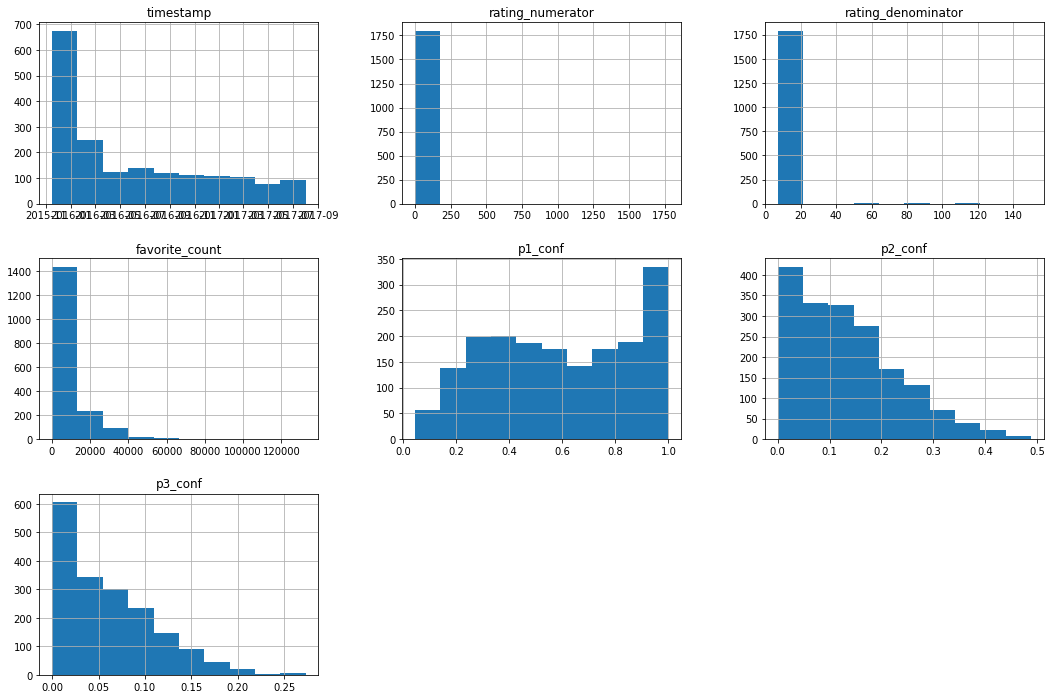

In [79]:
#visualize histogram of features
df_twitter.hist(figsize=(18,12));

### 1 What month has *the* average favorite tweet 

In [80]:
#What month has the average farorite_ count tweets
day_of_month_favorite_count = df_twitter['favorite_count'].groupby([df_twitter['timestamp'].dt.month]).mean()
day_of_month_favorite_count.head()

timestamp
1     7994.876147
2     9233.161290
3     8519.865385
4    12384.133333
5    14459.920455
Name: favorite_count, dtype: float64

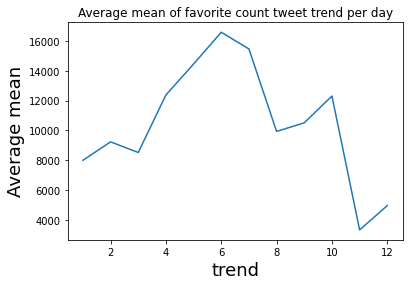

In [81]:
day_of_month_favorite_count.plot();
plt.title("Average mean of favorite count tweet trend per day");
plt.xlabel('trend', fontsize=18);
plt.ylabel("Average mean", fontsize=18);


The above shows that the average mean trend has the highest peak in june but has the lowest peak tweets in November.


### 2 What month has the most favorite tweet

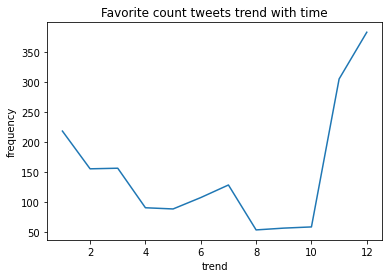

In [82]:
counts = df_twitter['favorite_count'].groupby([df_twitter['timestamp'].dt.month]).count().plot(kind='line',
                                                                                            title='Favorite count tweets trend with time',
                                                                                            xlabel='trend',
                                                                                            ylabel='frequency')                              

The above shows that the trend has the highest peak in December but has the lowest peak trend between August to Octomber compare to the Average mean of favorite count of tweets..


#### 3 What dog stage has the highest average mean favorite count


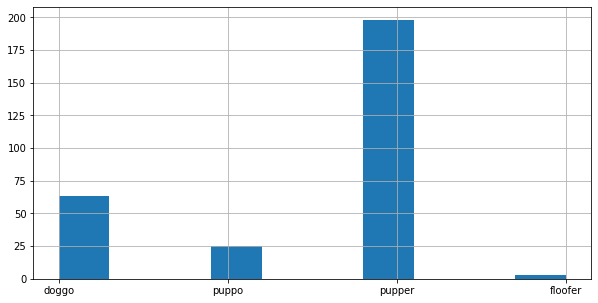

In [83]:
df_twitter['dog_stage'].hist(figsize=(10,5));

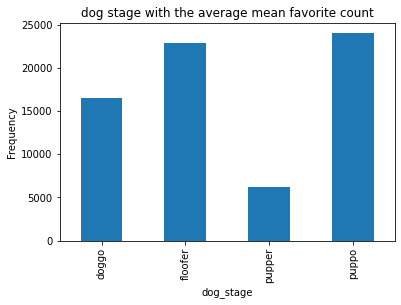

In [84]:
df_twitter.groupby('dog_stage')["favorite_count"].mean().plot(kind='bar', title='dog stage with the average mean favorite count', xlabel='dog_stage', ylabel='Frequency');

The above visualization, this shows that puppo has the highest average mean favorite count while pupper has the lowest average mean favorite count

#### 4.What dog stage has the most favorite count

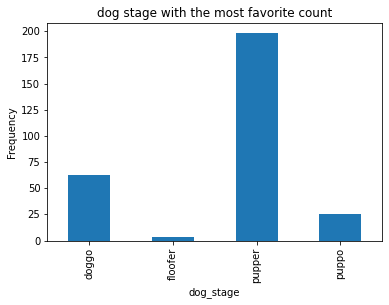

In [85]:
df_twitter.groupby('dog_stage')["favorite_count"].count().plot(kind='bar', title='dog stage with the most favorite count', xlabel='dog_stage', ylabel='Frequency');

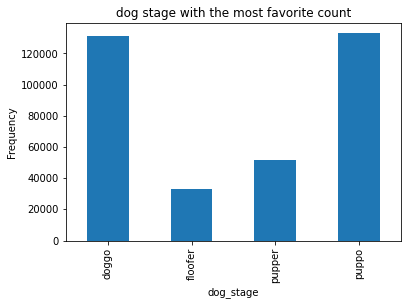

In [86]:
df_twitter.groupby('dog_stage')["favorite_count"].max().plot(kind='bar', title='dog stage with the most favorite count', xlabel='dog_stage', ylabel='Frequency');

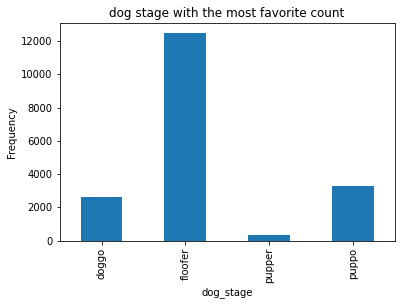

In [87]:
df_twitter.groupby('dog_stage')["favorite_count"].min().plot(kind='bar', title='dog stage with the most favorite count', xlabel='dog_stage', ylabel='Frequency');

The three above visualizations shows the dog state with their most , maximum amd minimum favorite count. pupper,puppo and floofer has the most, maximum and minimum favorite count respectively 